<a href="https://colab.research.google.com/github/Saulrega/fundamentos_ML/blob/main/Conociendo_el_set_de_datos_para_la_creacion_de_la_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

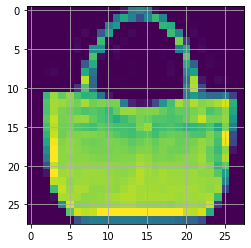

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

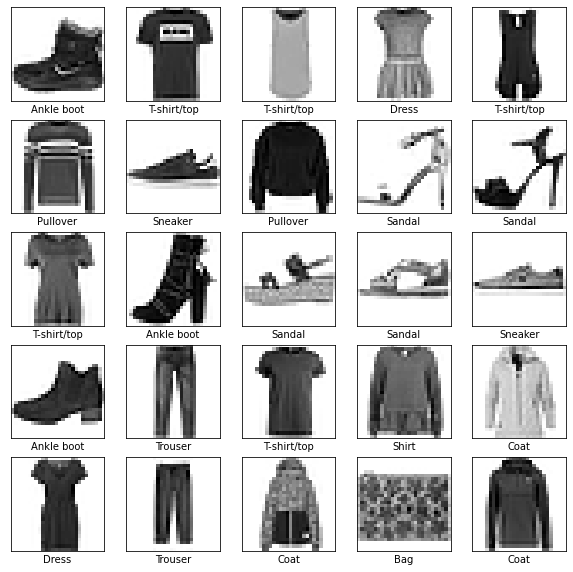

In [ ]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          keras.layers.Dense(128, activation=tf.nn.relu), 
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5012 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8892


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3554 - accuracy: 0.8741
Accuracy 0.8741000294685364


In [ ]:
predictions = model.predict(test_images)

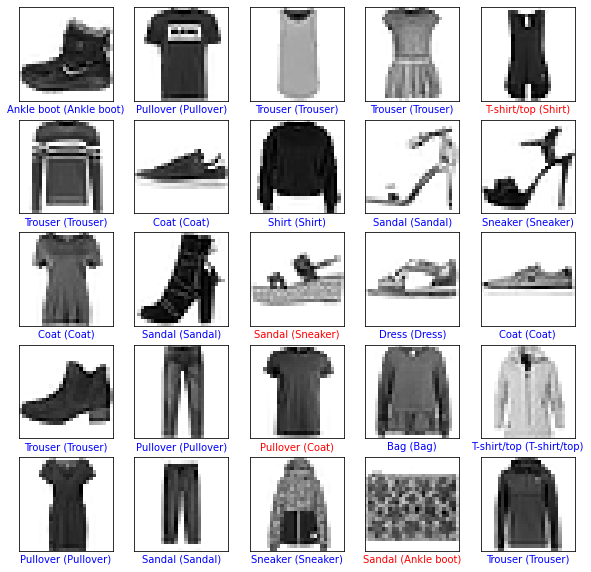

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if (predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)
  #predicted_label = np.argmax(predictions[i]), en este caso en predictions[i] nos retorna un array con las probabilidades de pertenecer a cada uno de los labels, es decir, la probabilidad de que sea cada prenda(bastaria que lo multipliques por 100 para sacar el porcentaje), por lo que la prediccion viene a ser la probabilidad maxima en ese array lo cual lo obtenemos con np.argmax que nos dara el index del valor maximo del array, entonces ya tendriamos el indice de la prediccion y bastaria con obtener el nombre de la prenda usando ese index en la lista de los nombres:(class_names[predicted_label])